### Demographic Health ML Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split


In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/refs/heads/main/demographic_health_data.csv'
df_raw = pd.read_csv(url)
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
2513,47175,5765,617,10.702515,591,10.251518,615,10.667823,542,9.401561,...,690,17.1,15.8,18.3,796,4.2,3.9,4.6,195,6
2570,48099,74808,10093,13.491873,8780,11.736713,15328,20.489787,12752,17.046305,...,3783,10.3,9.8,10.8,5948,2.6,2.5,2.8,1508,3
529,13293,26215,3258,12.427999,3161,12.057982,3320,12.664505,2846,10.856380,...,2201,15.6,14.7,16.5,3181,3.9,3.7,4.2,799,5
2122,39163,13139,1467,11.165233,1686,12.832027,1518,11.553391,1446,11.005404,...,1330,14.4,13.3,15.6,1483,3.7,3.4,4.0,379,6
2952,53003,22610,2424,10.720920,2580,11.410880,2364,10.455551,2587,11.441840,...,1515,12.7,11.6,13.8,2291,3.7,3.4,4.0,666,4
2470,47089,54012,5429,10.051470,6622,12.260238,6553,12.132489,5688,10.530993,...,4957,14.1,13.0,15.2,6128,3.5,3.2,3.7,1500,4
1219,25009,790638,90025,11.386374,99852,12.629294,100879,12.759189,97869,12.378484,...,39418,9.8,9.0,10.6,60737,2.8,2.6,3.1,17721,2
1008,21035,39135,4004,10.231251,5166,13.200460,8284,21.167753,4155,10.617095,...,3322,12.4,11.4,13.4,3977,3.1,2.9,3.4,990,5
995,21009,44176,5651,12.792014,5666,12.825969,5241,11.863908,5315,12.031420,...,4620,16.2,14.9,17.4,5477,3.8,3.5,4.1,1270,5
1034,21087,11049,1230,11.132229,1303,11.792922,1176,10.643497,1183,10.706851,...,1286,16.9,15.5,18.2,1473,4.0,3.7,4.3,350,6


# Data Dictionary

| Feature | Description |
|---------|-------------|
| fips | FIPS Code for the County |
| TOT_POP | Total Population (2019 Population Estimates, US Census) |
| 0-9 | Population aged 0-9 |
| 0-9 y/o % of total pop | % of the population aged 0-9 |
| 10-19 | Population aged 10-19 |
| 10-19 y/o % of total pop | % of the population aged 10-19 |
| 20-29 | Population aged 20-29 |
| 20-29 y/o % of total pop | % of the population aged 20-29 |
| 30-39 | Population aged 30-39 |
| 30-39 y/o % of total pop | % of the population aged 30-39 |
| 40-49 | Population aged 40-49 |
| 40-49 y/o % of total pop | % of the population aged 40-49 |
| 50-59 | Population aged 50-59 |
| 50-59 y/o % of total pop | % of the population aged 50-59 |
| 60-69 | Population aged 60-69 |
| 60-69 y/o % of total pop | % of the population aged 60-69 |
| 70-79 | Population aged 70-79 |
| 70-79 y/o % of total pop | % of the population aged 70-79 |
| 80+ | Population aged 80+ |
| 80+ y/o % of total pop | % of the population aged 80+ |
| White-alone pop | Population that is White only |
| % White-alone | % of population that is White only |
| Black-alone pop | Population that is Black only |
| % Black-alone | % of population that is Black only |
| Native American/American Indian-alone pop | Population that is Native American/AI only |
| % NA/AI-alone | % of population that is Native American/AI only |
| Asian-alone pop | Population that is Asian only |
| % Asian-alone | % of population that is Asian only |
| Hawaiian/Pacific Islander-alone pop | Population that is Hawaiian/PI only |
| % Hawaiian/PI-alone | % of population that is Hawaiian/PI only |
| Two or more races pop | Population of two or more races |
| % Two or more races | % of population of two or more races |
| N_POP_CHG_2018 | Numeric change in resident total population (7/1/2017–7/1/2018) |
| GQ_ESTIMATES_2018 | Group Quarters total population estimate (7/1/2018) |
| R_birth_2018 | Birth rate (7/1/2017–6/30/2018) |
| R_death_2018 | Death rate (7/1/2017–6/30/2018) |
| R_NATURAL_INC_2018 | Natural increase rate (7/1/2016–6/30/2017) |
| R_INTERNATIONAL_MIG_2018 | Net international migration rate (7/1/2017–6/30/2018) |
| R_DOMESTIC_MIG_2018 | Net domestic migration rate (7/1/2017–6/30/2018) |
| R_NET_MIG_2018 | Net migration rate (7/1/2017–6/30/2018) |
| Less than a high school diploma 2014-18 | Population with less than a high school diploma |
| High school diploma only 2014-18 | Population with high school diploma only |
| Some college or associate's degree 2014-18 | Population with some college/associate's degree |
| Bachelor's degree or higher 2014-18 | Population with a bachelor's degree or higher |
| Percent of adults with less than a high school diploma 2014-18 | % of adults with less than a high school diploma |
| Percent of adults with a high school diploma only 2014-18 | % of adults with a high school diploma only |
| Percent of adults completing some college or associate's degree 2014-18 | % of adults with some college/associate's degree |
| Percent of adults with a bachelor's degree or higher 2014-18 | % of adults with a bachelor's degree or higher |
| POVALL_2018 | Estimate of people of all ages in poverty (2018) |
| PCTPOVALL_2018 | Estimated % of people of all ages in poverty (2018) |
| PCTPOV017_2018 | Estimated % of people age 0-17 in poverty (2018) |
| PCTPOV517_2018 | Estimated % of children age 5-17 in families in poverty (2018) |
| MEDHHINC_2018 | Median household income (2018) |
| CI90LBINC_2018 | 90% CI lower bound for median household income (2018) |
| CI90UBINC_2018 | 90% CI upper bound for median household income (2018) |
| Civilian_labor_force_2018 | Civilian labor force annual average |
| Employed_2018 | Number employed (annual average) |
| Unemployed_2018 | Number unemployed (annual average) |
| Unemployment_rate_2018 | Unemployment rate |
| Med_HH_Income_Percent_of_State_Total_2018 | County median HH income as % of state total |
| Active Physicians per 100000 Population 2018 (AAMC) | Total active patient care physicians per 100k (2018) |
| Total Active Patient Care Physicians per 100000 Population 2018 (AAMC) | Active primary care physicians per 100k (2018) |
| Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC) | Active patient care primary care physicians per 100k (2018) |
| Active General Surgeons per 100000 Population 2018 (AAMC) | Active general surgeons per 100k (2018) |
| Active Patient Care General Surgeons per 100000 Population 2018 (AAMC) | Active patient care general surgeons per 100k (2018) |
| Total nurse practitioners (2019) | Total nurse practitioners (2019) |
| Total physician assistants (2019) | Total physician assistants (2019) |
| Total Hospitals (2019) | Total hospitals (2019) |
| Internal Medicine Primary Care (2019) | Active internal medicine primary care physicians (2019) |
| Family Medicine/General Practice Primary Care (2019) | Active family medicine/general practice primary care physicians (2019) |
| Total Specialist Physicians (2019) | Sum of specialist physicians (Psychiatry, Surgery, Anesthesiology, Emergency Med, Radiology, Cardiology, Oncology, Endocrinology, etc.) |
| ICU Beds_x | Number of ICU beds per county |
| Population Aged 60+ | Population aged 60+ |
| Percent of Population Aged 60+ | % of the population aged 60+ |
| STATE_FIPS | FIPS Code for the State |
| county_pop2018_18 and older | Population aged 18+ per county (2018) |
| anycondition_prevalence | Prevalence rate of any condition |
| anycondition_Lower 95% CI | Lower 95% CI for prevalence of any condition |
| anycondition_Upper 95% CI | Upper 95% CI for prevalence of any condition |
| anycondition_number | Population with any condition |
| Obesity_prevalence | Obesity prevalence |
| Obesity_Lower 95% CI | Lower 95% CI for obesity prevalence |
| Obesity_Upper 95% CI | Upper 95% CI for obesity prevalence |
| Obesity_number | Population with obesity |
| Heart disease_prevalence | Heart disease prevalence |
| Heart disease_Lower 95% CI | Lower 95% CI for heart disease prevalence |
| Heart disease_Upper 95% CI | Upper 95% CI for heart disease prevalence |
| Heart disease_number | Population with heart disease |
| COPD_prevalence | COPD prevalence |
| COPD_Lower 95% CI | Lower 95% CI for COPD prevalence |
| COPD_Upper 95% CI | Upper 95% CI for COPD prevalence |
| COPD_number | Population with COPD |
| diabetes_prevalence | Diabetes prevalence |
| diabetes_Lower 95% CI | Lower 95% CI for diabetes prevalence |
| diabetes_Upper 95% CI | Upper 95% CI for diabetes prevalence |
| diabetes_number | Population with diabetes |
| CKD_prevalence | Chronic kidney disease (CKD) prevalence |
| CKD_Lower 95% CI | Lower 95% CI for CKD prevalence |
| CKD_Upper 95% CI | Upper 95% CI for CKD prevalence |
| CKD_number | Population with CKD |
| Urban_rural_code | Rural-Urban Continuum Code (1–9, 88, 99) |


The data contains differenty type of information about countries and some disease. This work will focus on predicting **diabetes** prevalence. To do this (and at first sight), identifiers and raw number columns (percentages will be kept to avoid scaling later) will be used.

In [36]:
df_baking = df_raw.copy()

In [37]:
# Keep desired columns
df_baking.columns = df_baking.columns.str.lower()

key_words = ['%', 'percent', 'pct', 'med', 'active', 'total', 'prevalence', 'r_', 'active']

tmp_cols = ['n_pop_chg_2018', 'gq_estimates_2018', 'civilian_labor_force_2018',
             'unemployment_rate_2018', 'icu beds_x']

for col in df_baking.columns:
    for word in key_words:
        if word in col:
            tmp_cols.append(col)

In [ ]:
# Removing confidence intervals
keep_cols = [item for item in tmp_cols if '95%' not in item]

df_baking = df_baking[keep_cols]

df_baking

,n_pop_chg_2018,gq_estimates_2018,civilian_labor_force_2018,unemployment_rate_2018,icu beds_x,0-9 y/o % of total pop,0-9 y/o % of total pop,10-19 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,...,family medicine/general practice primary care (2019),total specialist physicians (2019),total population,percent of population aged 60+,anycondition_prevalence,obesity_prevalence,heart disease_prevalence,copd_prevalence,diabetes_prevalence,ckd_prevalence
0,158,455,25957,3.6,6,12.206615,12.206615,13.735364,13.735364,12.370281,...,21.249061,72.142154,55036,19.1,47.6,35.8,7.9,8.6,12.9,3.1
1,5403,2190,93849,3.6,51,11.355276,11.355276,12.344167,12.344167,10.814964,...,83.321572,282.882982,203360,26.3,40.2,29.7,7.8,8.6,12.0,3.2
2,-277,2820,8373,5.2,5,10.980266,10.980266,11.896628,11.896628,13.134520,...,9.508784,32.283033,26201,23.5,57.5,40.7,11.0,12.1,19.7,4.5
3,-155,2151,8661,4.0,0,10.964286,10.964286,11.589286,11.589286,13.522321,...,8.560619,29.063942,22580,21.1,51.6,38.7,8.6,10.0,14.1,3.3
4,13,489,25006,3.5,6,12.266598,12.266598,13.087828,13.087828,11.656293,...,22.104740,75.047251,57667,23.6,46.3,34.0,9.2,10.5,13.5,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,-496,660,21150,4.2,10,14.178532,14.178532,14.694200,14.694200,12.448027,...,28.018244,40.537033,44527,15.8,40.3,33.6,5.9,6.6,8.9,2.6
3136,-180,270,15340,3.0,6,10.328842,10.328842,9.466661,9.466661,12.854729,...,15.021465,21.733183,22923,18.7,24.3,19.4,5.2,4.9,7.2,2.4
3137,-157,220,8931,4.4,6,15.375142,15.375142,15.788955,15.788955,10.606434,...,13.210897,19.113638,20758,17.1,42.2,34.2,7.2,8.0,10.4,3.0
3138,-150,140,4058,4.2,0,10.881420,10.881420,14.115409,14.115409,9.067850,...,5.131678,7.424555,8253,26.7,37.5,28.4,8.2,8.3,11.3,3.4


In [39]:
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 75 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   n_pop_chg_2018                                                                 3140 non-null   int64  
 1   gq_estimates_2018                                                              3140 non-null   int64  
 2   civilian_labor_force_2018                                                      3140 non-null   int64  
 3   unemployment_rate_2018                                                         3140 non-null   float64
 4   icu beds_x                                                                     3140 non-null   int64  
 5   0-9 y/o % of total pop                                                         3140 non-null   float64
 6   0-9 y/o % of total pop  

/tmp/ipykernel_3529/2525118135.py:2: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


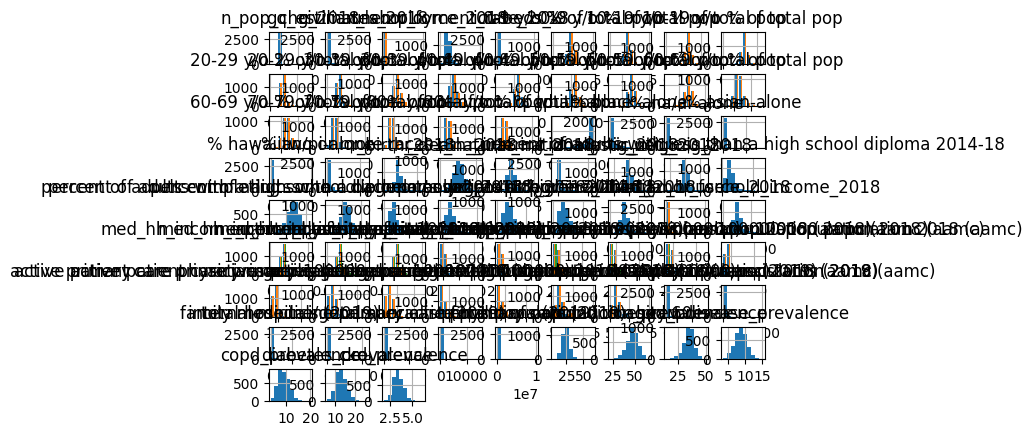

In [41]:
df_baking.hist()
plt.tight_layout()
plt.show()